# 查看FashionMNIST原始数据格式

In [12]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from wangdao_deeplearning_train import EarlyStopping, ModelSaver,train_classification_model,plot_learning_curves
from wangdao_deeplearning_train import evaluate_classification_model as evaluate_model


C:\Users\HDS\AppData\Roaming\Python\Python312\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\HDS\AppData\Roaming\Python\Python312\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

c:\Program Files\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Program Files\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Program Files\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Program Files\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26500 (\N{CJK UNIFIED IDEOGRAPH-6784}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Program Files\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) 

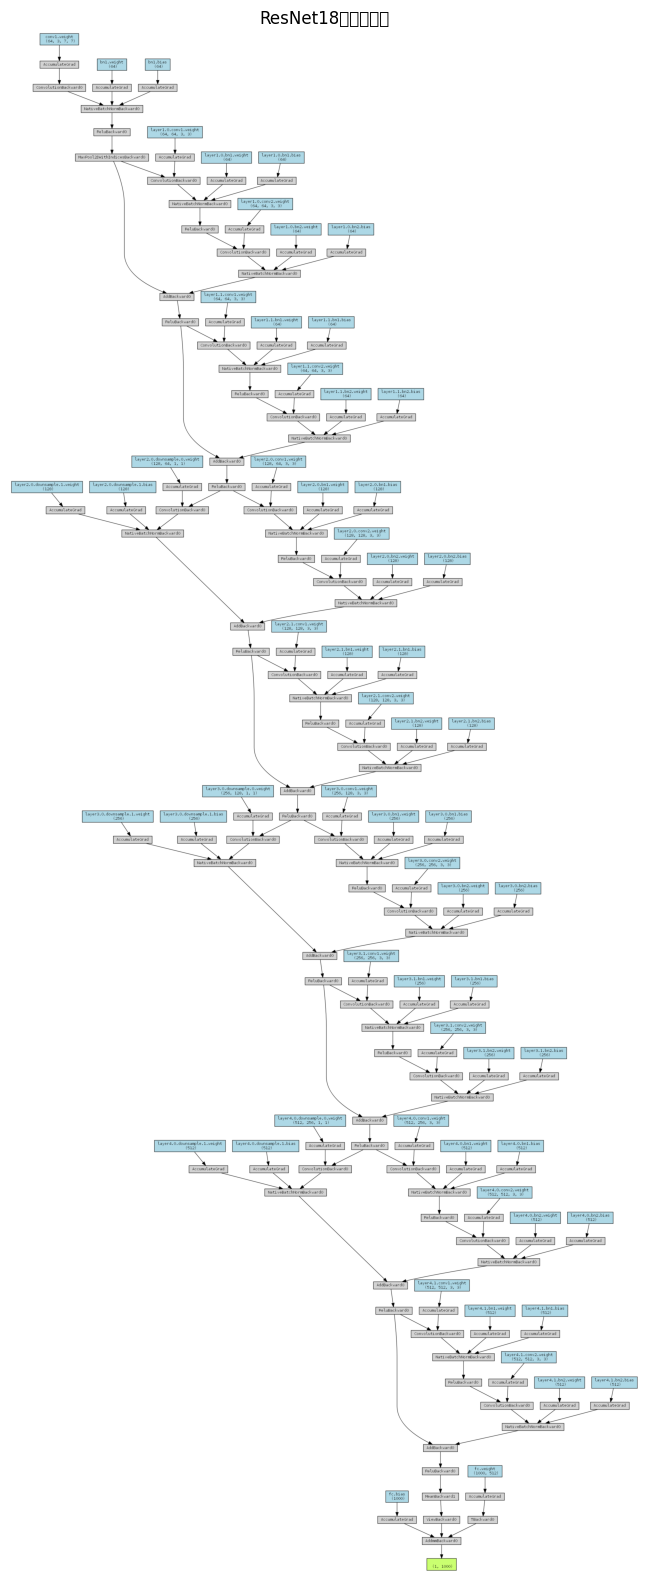

ResNet18模型的详细参数信息:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14

In [ ]:
import torchvision.models as models

# 加载预训练的ResNet18模型
ResNet18 = models.ResNet18(pretrained=True)

# 打印模型结构
print(ResNet18)
total_params = sum(p.numel() for p in ResNet18.parameters())
print(f"resnet18模型的总参数量: {total_params:,}")

# 导入可视化模型结构所需的库
import torch
from torchviz import make_dot
from torch.autograd import Variable
import matplotlib.pyplot as plt
import io
from PIL import Image
from torchsummary import summary
import numpy as np  # 补充缺失的numpy导入

# 创建一个示例输入
x = Variable(torch.randn(1, 3, 224, 224))

# 获取模型输出
y = ResNet18(x)

# 使用make_dot生成计算图
dot = make_dot(y, params=dict(ResNet18.named_parameters()))

# 保存计算图为图片
dot.format = 'png'
dot.render("resnet18_structure", cleanup=True)

# 显示模型结构图
try:
    img = Image.open("resnet18_structure.png")
    plt.figure(figsize=(15, 20))
    plt.imshow(np.array(img))
    plt.axis('off')
    plt.title("ResNet18模型结构图")
    plt.show()
except:
    print("无法显示图像，请检查torchviz是否正确安装")

# 使用torchsummary打印模型的详细参数信息
print("ResNet18模型的详细参数信息:")
summary(ResNet18, (3, 224, 224), device="cpu")


# 加载数据并处理为tensor

In [14]:
# 加载CIFAR-10数据集
import os
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset

# 定义CIFAR-10数据集类
class CIFAR10Dataset(Dataset):
    def __init__(self, img_dir, labels_df, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        
        self.labels_df = labels_df
        self.img_names = self.labels_df.iloc[:, 0].values.astype(str)  # 第一列是图片名称，确保为字符串类型
        
        # 类别名称字典，使用字典可以提高查找速度
        self.class_names_dict = {'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 
                                 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
        # 将文本标签转换为数字ID
        self.labels = [self.class_names_dict[label] for label in self.labels_df.iloc[:, 1].values]
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_names[idx] + '.png') #图片路径
        image = Image.open(img_path) #打开图片
        label = self.labels[idx] #标签
        
        if self.transform:
            image_tensor = self.transform(image) #转换为张量
            
        return image_tensor, label

# 读取标签文件
img_dir = r"D:\cifar-10\train\train"
labels_file = r"D:\cifar-10\trainLabels.csv"
labels_df = pd.read_csv(labels_file)

# 划分数据集
train_size = 45000
val_size = 5000
train_df = labels_df.iloc[:train_size]
val_df = labels_df.iloc[train_size:]

# 定义训练集数据预处理（包含图像增强）
train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomRotation(40), #随机旋转
    transforms.RandomHorizontalFlip(),  #随机水平翻转
    transforms.Normalize((0.4917, 0.4823, 0.4467), (0.2024, 0.1995, 0.2010))
])

# 定义验证集数据预处理（不做图像增强）
val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4917, 0.4823, 0.4467), (0.2024, 0.1995, 0.2010))
])

# 创建训练集和验证集
train_dataset = CIFAR10Dataset(img_dir=img_dir, labels_df=train_df, transform=train_transform)
val_dataset = CIFAR10Dataset(img_dir=img_dir, labels_df=val_df, transform=val_transform)

# 定义类别名称
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 查看数据集基本信息
print(f"训练集大小: {len(train_dataset)}")
print(f"验证集大小: {len(val_dataset)}")


训练集大小: 45000
验证集大小: 5000


In [15]:
def cal_mean_std(ds):
    mean = 0.
    std = 0.
    for img, _ in ds:
        mean += img.mean(dim=(1, 2)) #dim=(1, 2)表示在通道维度上求平均
        std += img.std(dim=(1, 2))  #dim=(1, 2)表示在通道维度上求标准差
    mean /= len(ds)
    std /= len(ds)
    return mean, std
# cal_mean_std(train_dataset)

# 把数据集划分为训练集45000和验证集5000，并给DataLoader

In [16]:

# 创建数据加载器
batch_size = 64
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True #打乱数据集，每次迭代时，数据集的顺序都会被打乱
)

val_loader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False
)




# 搭建模型

In [17]:
#理解每个接口的方法，单独写例子
import torch.nn as nn
m=nn.BatchNorm1d(100)
x=torch.randn(20,100)
print(m(x).shape)

torch.Size([20, 100])


# 搭建模型

In [ ]:
# 定义残差块类
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()

        # 第一个卷积层
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

        # 第二个卷积层
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # 如果输入和输出通道数不同或步长不为1，则需要使用1x1卷积进行调整
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        out += self.shortcut(residual) # 残差连接
        out = self.relu(out)

        return out

# 定义ResNet18模型
class ResNet18(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()

        # 初始卷积层
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)

        # 残差层
        self.layer1 = self._make_layer(64, 64, 2, stride=1)
        self.layer2 = self._make_layer(64, 128, 2, stride=2) #分别代表输入通道数，输出通道数，残差块数量，步长
        self.layer3 = self._make_layer(128, 256, 2, stride=2)
        self.layer4 = self._make_layer(256, 512, 2, stride=2)

        # 全局平均池化和全连接层
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, in_channels, out_channels, num_blocks, stride):
        """
        创建一个残差层
        :param in_channels: 输入通道数
        :param out_channels: 输出通道数
        :param num_blocks: 残差块数量
        :param stride: 步长
        :return: 残差层
        """
        layers = []
        # 第一个残差块可能需要调整通道数和特征图大小
        layers.append(ResidualBlock(in_channels, out_channels, stride))

        # 后续残差块的输入通道数已经是out_channels
        for _ in range(1, num_blocks):
            layers.append(ResidualBlock(out_channels, out_channels))

        return nn.Sequential(*layers) #*解包

    def forward(self, x):
        # print(f"输入形状: {x.shape}")

        x = self.conv1(x)
        # print(f"conv1后形状: {x.shape}")
        x = self.bn1(x)
        x = self.relu(x)

        x = self.layer1(x)
        # print(f"layer1后形状: {x.shape}")
        x = self.layer2(x) #输出shape是[1, 128, 16, 16]
        # print(f"layer2后形状: {x.shape}")
        x = self.layer3(x) #输出shape是[1, 256, 8, 8]
        # print(f"layer3后形状: {x.shape}")
        x = self.layer4(x) #输出shape是[1, 512, 4, 4]
        # print(f"layer4后形状: {x.shape}")

        x = self.avgpool(x)
        # print(f"avgpool后形状: {x.shape}")
        x = torch.flatten(x, 1)
        # print(f"flatten后形状: {x.shape}")
        x = self.fc(x)
        # print(f"fc后形状: {x.shape}")

        return x

In [29]:
# 实例化模型
model = ResNet18()

# 从train_loader获取第一个批次的数据
dataiter = iter(train_loader)
images, labels = next(dataiter)

# 查看批次数据的形状
print("批次图像形状:", images.shape)
print("批次标签形状:", labels.shape)


print('-'*100)
# 进行前向传播
with torch.no_grad():  # 不需要计算梯度
    outputs = model(images)
    

print(outputs.shape)


批次图像形状: torch.Size([64, 3, 32, 32])
批次标签形状: torch.Size([64])
----------------------------------------------------------------------------------------------------
输入形状: torch.Size([64, 3, 32, 32])
conv1后形状: torch.Size([64, 64, 32, 32])
layer1后形状: torch.Size([64, 64, 32, 32])
layer2后形状: torch.Size([64, 128, 16, 16])
layer3后形状: torch.Size([64, 256, 8, 8])
layer4后形状: torch.Size([64, 512, 4, 4])
avgpool后形状: torch.Size([64, 512, 1, 1])
flatten后形状: torch.Size([64, 512])
fc后形状: torch.Size([64, 10])
torch.Size([64, 10])


In [21]:
# 计算模型的总参数量
# 统计需要求梯度的参数总量
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"需要求梯度的参数总量: {total_params}")

# 统计所有参数总量
all_params = sum(p.numel() for p in model.parameters())
print(f"模型总参数量: {all_params}")

# 查看每层参数量明细
print("\n各层参数量明细:")
for name, param in model.named_parameters():
    print(f"{name}: {param.numel()} 参数")


需要求梯度的参数总量: 11173962
模型总参数量: 11173962

各层参数量明细:
conv1.weight: 1728 参数
bn1.weight: 64 参数
bn1.bias: 64 参数
layer1.0.conv1.weight: 36864 参数
layer1.0.bn1.weight: 64 参数
layer1.0.bn1.bias: 64 参数
layer1.0.conv2.weight: 36864 参数
layer1.0.bn2.weight: 64 参数
layer1.0.bn2.bias: 64 参数
layer1.1.conv1.weight: 36864 参数
layer1.1.bn1.weight: 64 参数
layer1.1.bn1.bias: 64 参数
layer1.1.conv2.weight: 36864 参数
layer1.1.bn2.weight: 64 参数
layer1.1.bn2.bias: 64 参数
layer2.0.conv1.weight: 73728 参数
layer2.0.bn1.weight: 128 参数
layer2.0.bn1.bias: 128 参数
layer2.0.conv2.weight: 147456 参数
layer2.0.bn2.weight: 128 参数
layer2.0.bn2.bias: 128 参数
layer2.0.shortcut.0.weight: 8192 参数
layer2.0.shortcut.1.weight: 128 参数
layer2.0.shortcut.1.bias: 128 参数
layer2.1.conv1.weight: 147456 参数
layer2.1.bn1.weight: 128 参数
layer2.1.bn1.bias: 128 参数
layer2.1.conv2.weight: 147456 参数
layer2.1.bn2.weight: 128 参数
layer2.1.bn2.bias: 128 参数
layer3.0.conv1.weight: 294912 参数
layer3.0.bn1.weight: 256 参数
layer3.0.bn1.bias: 256 参数
layer3.0.conv2.weight:

In [23]:
model.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[ 0.1027, -0.1363,  0.1386],
                        [-0.1681, -0.1652,  0.1703],
                        [-0.1913, -0.1507, -0.1673]],
              
                       [[ 0.0933, -0.1597,  0.0443],
                        [ 0.0186,  0.1142,  0.0726],
                        [-0.1315,  0.0315, -0.1192]],
              
                       [[-0.0500,  0.1049,  0.1841],
                        [-0.1722,  0.0554, -0.0614],
                        [ 0.1131, -0.1695, -0.0734]]],
              
              
                      [[[ 0.0927, -0.1887,  0.0191],
                        [-0.0918, -0.1501,  0.0684],
                        [-0.1521, -0.0915,  0.0434]],
              
                       [[-0.1188,  0.1702,  0.1785],
                        [-0.0955, -0.0227, -0.0919],
                        [ 0.0395, -0.1057,  0.1476]],
              
                       [[-0.0562, -0.0431,  0.1005],
                        [ 

# 设置交叉熵损失函数，SGD优化器

In [24]:
model = ResNet18()
# 定义损失函数和优化器
loss_fn = nn.CrossEntropyLoss()  # 交叉熵损失函数，适用于多分类问题，里边会做softmax，还有会把0-9标签转换成one-hot编码

print("损失函数:", loss_fn)



损失函数: CrossEntropyLoss()


In [25]:
model = ResNet18()

optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # SGD优化器，学习率为0.01，动量为0.9

In [26]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"使用设备: {device}")
model = model.to(device) #将模型移动到GPU
early_stopping=EarlyStopping(patience=5, delta=0.001)
model_saver=ModelSaver(save_dir='model_weights', save_best_only=True)


model, history = train_classification_model(model, train_loader, val_loader, loss_fn, optimizer, device, num_epochs=50, early_stopping=early_stopping, model_saver=model_saver, tensorboard_logger=None)



使用设备: cpu
训练开始，共35200步


  0%|          | 0/35200 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
history['train'][-100:-1]

In [ ]:
history['val'][-1000:-1]

# 绘制损失曲线和准确率曲线

In [ ]:
plot_learning_curves(history, sample_step=500)  #横坐标是 steps

In [ ]:
# 导入所需库
import os
import pandas as pd
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import tqdm

# 定义测试数据集类
class CIFAR10TestDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        """
        初始化测试数据集
        
        参数:
            img_dir: 测试图片目录
            transform: 图像预处理变换
        """
        self.img_dir = img_dir
        self.transform = transform
        self.img_files = [f for f in os.listdir(img_dir) if f.endswith('.png')]
        
    def __len__(self):
        return len(self.img_files)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_files[idx])
        image = Image.open(img_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
            
        # 提取图像ID（文件名去掉扩展名）
        img_id = int(os.path.splitext(self.img_files[idx])[0])
        
        return image, img_id

# 定义预测函数
def predict_test_set(model, img_dir, labels_file, device, batch_size=64):
    """
    预测测试集并生成提交文件
    
    参数:
        model: 训练好的模型
        img_dir: 测试图片目录
        labels_file: 提交模板文件路径
        device: 计算设备
        batch_size: 批处理大小
    """
    # 图像预处理变换（与训练集相同）
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4917, 0.4823, 0.4467), (0.2024, 0.1995, 0.2010))
    ])
    
    # 创建测试数据集和数据加载器
    test_dataset = CIFAR10TestDataset(img_dir, transform=transform)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    # 设置模型为评估模式
    model.eval()
    
    # 读取提交模板
    submission_df = pd.read_csv(labels_file)
    predictions = {}
    
    # 使用tqdm显示进度条
    print("正在预测测试集...")
    with torch.no_grad():
        for images, img_ids in tqdm.tqdm(test_loader, desc="预测进度"):
            images = images.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1) #取最大的索引，作为预测结果 
            
            # 记录每个图像的预测结果
            for i, img_id in enumerate(img_ids):
                predictions[img_id.item()] = predicted[i].item() #因为一个批次有多个图像，所以需要predicted[i]
    
    # 定义类别名称
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    
    # 将数值标签转换为类别名称
    labeled_predictions = {img_id: class_names[pred] for img_id, pred in predictions.items()}
    
    # 直接创建DataFrame
    submission_df = pd.DataFrame({
        'id': list(labeled_predictions.keys()),
        'label': list(labeled_predictions.values())
    })
    
    # 按id列排序
    submission_df = submission_df.sort_values(by='id')
    
    # 检查id列是否有重复值
    has_duplicates = submission_df['id'].duplicated().any()
    print(f"id列是否有重复值: {has_duplicates}")
    
    # 保存预测结果
    output_file = 'cifar10_submission.csv'
    submission_df.to_csv(output_file, index=False)
    print(f"预测完成，结果已保存至 {output_file}")

# 执行测试集预测
img_dir = r"D:\cifar-10\test\test"
labels_file = r"D:\cifar-10\sampleSubmission.csv"
predict_test_set(model, img_dir, labels_file, device, batch_size=128)


正在预测测试集...


预测进度:   0%|          | 0/2344 [00:00<?, ?it/s]